# Minería de textos

### Docente: M.Sc. Richard Fernández

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import re
import string
import io
import nltk
import tweepy
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from google.colab import files

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
#pip install git+https://github.com/tweepy/tweepy.git

In [2]:
client = tweepy.Client("PON TU KEY")

In [90]:
#El usuario para análisis
name = "MartinVizcarraC"

In [115]:
tweepy.__version__

'4.10.0'

In [91]:
#Número de tweets
tweetCount = 1000

In [92]:
respuesta =client.get_user(username=name)

In [93]:
print(respuesta)

Response(data=<User id=4825296327 name=Martín Vizcarra username=MartinVizcarraC>, includes={}, errors=[], meta={})


In [62]:
#tws=client.get_users_mentions(id)

In [94]:
tws2=client.get_users_tweets(id=4825296327,max_results=100)

In [95]:
df2=pd.DataFrame(tws2[0])

In [98]:
df2.head()

,id,text
0,1532054721938214913,Nos encontramos reunidos con el Comité Ejecuti...
1,1529516767432810496,Estamos empezando una crisis alimentaria sin p...
2,1526977433743794176,Hoy como todos los miércoles nos conectamos en...
3,1526348031855058944,"Buenas noches,hoy estaré en el programa de est..."
4,1524441711652610057,El día de hoy en horas de la tarde he sido inv...


In [96]:
text_df = df2[['text']]

In [99]:
text_df = pd.DataFrame(df2['text'])
text_df.head(5)

,text
0,Nos encontramos reunidos con el Comité Ejecuti...
1,Estamos empezando una crisis alimentaria sin p...
2,Hoy como todos los miércoles nos conectamos en...
3,"Buenas noches,hoy estaré en el programa de est..."
4,El día de hoy en horas de la tarde he sido inv...


In [116]:
text_df.shape

(100, 5)

In [100]:
def cleanUpTweet(txt):
  txt = txt.lower() #convierte a minúscula
  txt = re.sub(r'http\S+','',txt) #remueve páginas web
  txt = re.sub(r'http?:\/\/[A-Za-z0-9\.\/]+','',txt) #remueve urls
  txt = re.sub(r'www.\S+','',txt) #remueve www.
  txt = txt.translate(str.maketrans(r'[áéíóúÁÉÍÓÚ]', r'[aeiouAEIOU]')) # Remueve tíldes
  txt = txt.translate(str.maketrans(r'[ñÑ]', r'[nN]')) # Remueve ñs
  txt = re.sub(r'@[A-Za-z0-9_]+','',txt) #remueve menciones
  txt = re.sub(r'([@#][A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','',txt) #remueve hashtags
  txt = re.sub(r'(RT|retweet|from|via)((?:\\b\\W*@\\w+)+)','',txt) #remueve retweets
  txt = re.sub(r'\[.*?\]','',txt) #remueve caracteres especiales
  txt = re.sub(r'\n','',txt) #remueve \n
  txt = re.sub(r'[%s]' % re.escape(string.punctuation),'',txt) #remueve puntos
  txt = re.compile(r'\b(' + r'|'.join(stopwords.words('spanish')) + r')\b\s*').sub('',txt) #remueve stopwords
  txt = re.sub(r"\\s+",' ',txt) #remueves espacios en blanco
  return txt

In [101]:
text_df['text_clean'] = text_df['text'].apply(cleanUpTweet)
text_df.head(5)

,text,text_clean
0,Nos encontramos reunidos con el Comité Ejecuti...,encontramos reunidos comite ejecutivo nacional...
1,Estamos empezando una crisis alimentaria sin p...,empezando crisis alimentaria precedentes gobie...
2,Hoy como todos los miércoles nos conectamos en...,hoy miercoles conectamos 100 pm vemos
3,"Buenas noches,hoy estaré en el programa de est...",buenas nocheshoy estare programa estreno sabe ...
4,El día de hoy en horas de la tarde he sido inv...,dia hoy horas tarde sido invitado congreso rep...


In [102]:
#Eliminamos filas vacías
text_df = text_df.drop(text_df[text_df['text_clean'] == ''].index)
text_df.head(5)

,text,text_clean
0,Nos encontramos reunidos con el Comité Ejecuti...,encontramos reunidos comite ejecutivo nacional...
1,Estamos empezando una crisis alimentaria sin p...,empezando crisis alimentaria precedentes gobie...
2,Hoy como todos los miércoles nos conectamos en...,hoy miercoles conectamos 100 pm vemos
3,"Buenas noches,hoy estaré en el programa de est...",buenas nocheshoy estare programa estreno sabe ...
4,El día de hoy en horas de la tarde he sido inv...,dia hoy horas tarde sido invitado congreso rep...


In [103]:
#Calculo de la subjetividad y polaridad
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [118]:
text_df['Subjectivity'] = text_df['text_clean'].apply(getTextSubjectivity)
text_df['Polarity'] = text_df['text_clean'].apply(getTextPolarity)
text_df.head(5)

,text,text_clean,Subjectivity,Polarity,Score
0,Nos encontramos reunidos con el Comité Ejecuti...,encontramos reunidos comite ejecutivo nacional...,0.0,0.0,Neutral
1,Estamos empezando una crisis alimentaria sin p...,empezando crisis alimentaria precedentes gobie...,0.0,0.0,Neutral
2,Hoy como todos los miércoles nos conectamos en...,hoy miercoles conectamos 100 pm vemos,0.0,0.0,Neutral
3,"Buenas noches,hoy estaré en el programa de est...",buenas nocheshoy estare programa estreno sabe ...,0.0,0.0,Neutral
4,El día de hoy en horas de la tarde he sido inv...,dia hoy horas tarde sido invitado congreso rep...,0.0,0.0,Neutral


In [119]:
text_df.head(15)

,text,text_clean,Subjectivity,Polarity,Score
0,Nos encontramos reunidos con el Comité Ejecuti...,encontramos reunidos comite ejecutivo nacional...,0.0,0.0,Neutral
1,Estamos empezando una crisis alimentaria sin p...,empezando crisis alimentaria precedentes gobie...,0.0,0.0,Neutral
2,Hoy como todos los miércoles nos conectamos en...,hoy miercoles conectamos 100 pm vemos,0.0,0.0,Neutral
3,"Buenas noches,hoy estaré en el programa de est...",buenas nocheshoy estare programa estreno sabe ...,0.0,0.0,Neutral
4,El día de hoy en horas de la tarde he sido inv...,dia hoy horas tarde sido invitado congreso rep...,0.0,0.0,Neutral
5,Mientras todos estamos preocupados por los des...,mientras preocupados desatinos gobierno congre...,0.0,0.0,Neutral
6,"Nueva Constitución, ¿es necesaria ?.\n¿Es la p...",nueva constitucion necesaria prioridad pais h...,0.0,0.0,Neutral
7,"Después de la reflexión de Semana Santa, y su ...",despues reflexion semana santa compromiso card...,0.0,0.0,Neutral
8,En este momento tan complejo que vive nuestro ...,momento tan complejo vive pais salida doy opin...,0.0,0.0,Neutral
9,!Gracias muchachos! Necesitábamos una alegría ...,gracias muchachos necesitabamos alegria nacion...,0.0,0.0,Neutral


In [120]:
#Generación de Score con las categorías negativo, neutral, positivo
def getTextAnalysis(a):
  if a < 0:
    return "Negativo"
  elif a == 0:
    return "Neutral"
  else:
    return "Positivo"

In [121]:
text_df['Score'] = text_df['Polarity'].apply(getTextAnalysis)
text_df.head(15)

,text,text_clean,Subjectivity,Polarity,Score
0,Nos encontramos reunidos con el Comité Ejecuti...,encontramos reunidos comite ejecutivo nacional...,0.0,0.0,Neutral
1,Estamos empezando una crisis alimentaria sin p...,empezando crisis alimentaria precedentes gobie...,0.0,0.0,Neutral
2,Hoy como todos los miércoles nos conectamos en...,hoy miercoles conectamos 100 pm vemos,0.0,0.0,Neutral
3,"Buenas noches,hoy estaré en el programa de est...",buenas nocheshoy estare programa estreno sabe ...,0.0,0.0,Neutral
4,El día de hoy en horas de la tarde he sido inv...,dia hoy horas tarde sido invitado congreso rep...,0.0,0.0,Neutral
5,Mientras todos estamos preocupados por los des...,mientras preocupados desatinos gobierno congre...,0.0,0.0,Neutral
6,"Nueva Constitución, ¿es necesaria ?.\n¿Es la p...",nueva constitucion necesaria prioridad pais h...,0.0,0.0,Neutral
7,"Después de la reflexión de Semana Santa, y su ...",despues reflexion semana santa compromiso card...,0.0,0.0,Neutral
8,En este momento tan complejo que vive nuestro ...,momento tan complejo vive pais salida doy opin...,0.0,0.0,Neutral
9,!Gracias muchachos! Necesitábamos una alegría ...,gracias muchachos necesitabamos alegria nacion...,0.0,0.0,Neutral


In [122]:
positive = text_df[text_df['Score'] == 'Positivo']
print(str(positive.shape[0]/(text_df.shape[0])*100) + " % de tweets positivos")

16.0 % de tweets positivos


In [123]:
negative = text_df[text_df['Score'] == 'Negativo']
print(str(negative.shape[0]/(text_df.shape[0])*100) + " % de tweets negativos")

1.0 % de tweets negativos


In [124]:
neutral = text_df[text_df['Score'] == 'Neutral']
print(str(neutral.shape[0]/(text_df.shape[0])*100) + " % de tweets neutrales")

83.0 % de tweets neutrales


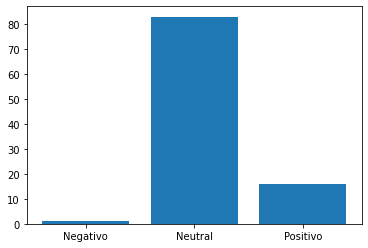

In [125]:
labels = text_df.groupby('Score').count().index.values
values = text_df.groupby('Score').size().values
plt.bar(labels, values)
plt.show()

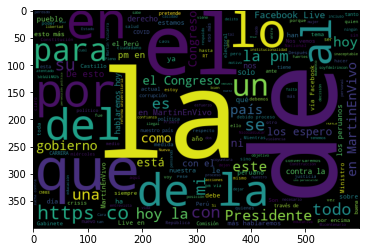

In [113]:
words = ' '.join([tweet for tweet in text_df['text']])
wordCloud = WordCloud(width = 600,height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

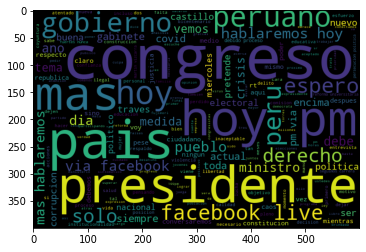

In [114]:
words = ' '.join([tweet for tweet in text_df['text_clean']])
wordCloud = WordCloud(width = 600,height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

In [ ]:
#Tarea
#1. Analizar las asociaciones
#2. Crear cluster de palabras